In [1]:
%matplotlib inline
import pandas as pd
from blockchain import statistics
stat=statistics.get()
d=stat.difficulty

In [2]:
def price(d):
    b_b=12.5
    d_w=.12/(3.6*10**6)
    w_h=.1/10**9
    hash_price= d_w * w_h
    plock_price = d * 2**32 * hash_price
    bit_price = plock_price / b_b
    bit_price
    return bit_price

In [3]:
dif_url = "https://api.blockchain.info/charts/difficulty?format=csv&timespan=all"
price_url="https://blockchain.info/charts/market-price?format=csv&timespan=all"

In [4]:
dif_df=pd.read_csv(dif_url,names=['date','difficulty'])
dif_df['date']=pd.to_datetime(dif_df.date)
dif_df.set_index('date',inplace=True)

In [5]:
dif_df['cost']=dif_df.difficulty.apply(lambda x:price(x))

In [8]:
price_df=pd.read_csv(price_url,names=['date','price'])
price_df['date']=pd.to_datetime(price_df.date)
price_df.set_index('date',inplace=True)

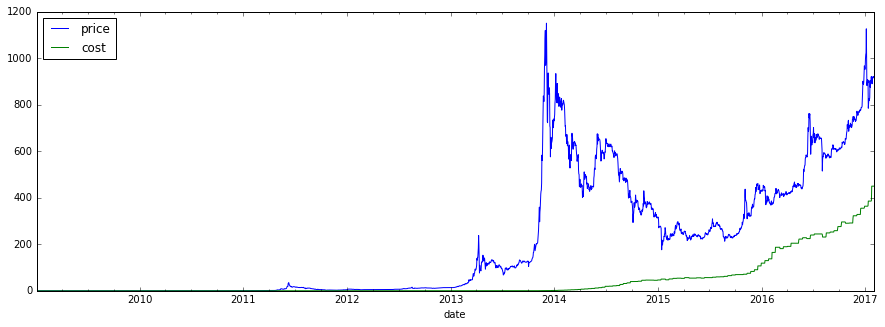

In [16]:
df=dif_df.merge(price_df,left_index=True,right_index=True)
df[['price','cost']].plot(figsize=(15,5))